In [11]:
pwd

'C:\\Users\\Axl\\PycharmProjects\\IA'

In [12]:
#CODIGO PARA SACAR LAS IMAGENES DE LOS VIDEOS
import numpy as np 
import cv2 as cv

rostro = cv.CascadeClassifier('haarcascade_frontalface_alt.xml')

In [3]:
cap = cv.VideoCapture('C:\\Users\\Rodrigo\\Desktop\\InteligenciaArtificial\\deteccion de desastres\\Videos\\robocasa5.mp4')
i = 2599
while True:
    ret, frame = cap.read()
    frame = cv.resize(frame, (50,50), interpolation = cv.INTER_AREA)
    cv.imwrite('C:\\Users\\Rodrigo\\Desktop\\InteligenciaArtificial\\deteccion de desastres\\5 situaciones\\robocasa\\robocasaimg'+str(i)+'.jpg', frame)
        
    cv.imshow('situacion', frame)
    i=i+1
    k = cv.waitKey(1)
    if k == 27:
        break
cap.release()
cv.destroyAllWindows()


error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


In [ ]:
#escalar las imagenes

def escala(imx, escala):
    width = int(imx.shape[1] * escala / 100)
    height = int(imx.shape[0] * escala / 100)
    size = (width, height)
    im = cv.resize(imx, size, interpolation = cv.INTER_AREA)
    return im

In [13]:
import numpy as np
import os
import re
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [14]:
import keras
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential,Model
from tensorflow.keras.layers import Input
from keras.layers import Dense, Dropout, Flatten
#from keras.layers import Conv2D, MaxPooling2D
#from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    BatchNormalization, SeparableConv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense, Conv2D
)
from keras.layers import LeakyReLU

In [15]:
pwd

'C:\\Users\\Axl\\PycharmProjects\\IA'

In [16]:
dirname = os.path.join(os.getcwd(),'C:\\Users\\Axl\\PycharmProjects\\IA\\tonos\\dataColors50')
imgpath = dirname + os.sep 

images = []
directories = []
dircount = []
prevRoot=''
cant=0

print("leyendo imagenes de ",imgpath)

for root, dirnames, filenames in os.walk(imgpath):
    for filename in filenames:
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            cant=cant+1
            filepath = os.path.join(root, filename)
            image = plt.imread(filepath)
            if(len(image.shape)==3):
                
                images.append(image)
            b = "Leyendo..." + str(cant)
            print (b, end="\r")
            if prevRoot !=root:
                print(root, cant)
                prevRoot=root
                directories.append(root)
                dircount.append(cant)
                cant=0
dircount.append(cant)

dircount = dircount[1:]
dircount[0]=dircount[0]+1
print('Directorios leidos:',len(directories))
print("Imagenes en cada directorio", dircount)
print('suma Total de imagenes en subdirs:',sum(dircount))

leyendo imagenes de  C:\Users\Axl\PycharmProjects\IA\tonos\dataColors50\
C:\Users\Axl\PycharmProjects\IA\tonos\dataColors50\bocho 1
C:\Users\Axl\PycharmProjects\IA\tonos\dataColors50\buga 14056
C:\Users\Axl\PycharmProjects\IA\tonos\dataColors50\cyber 14400
C:\Users\Axl\PycharmProjects\IA\tonos\dataColors50\humer 14400
C:\Users\Axl\PycharmProjects\IA\tonos\dataColors50\lambo 14400
Directorios leidos: 5
Imagenes en cada directorio [14057, 14400, 14400, 14400, 14399]
suma Total de imagenes en subdirs: 71656


In [89]:
labels=[]
indice=0
for cantidad in dircount:
    for i in range(cantidad):
        labels.append(indice)
    indice=indice+1
print("Cantidad etiquetas creadas: ",len(labels))

Cantidad etiquetas creadas:  71656


In [90]:
situaciones=[]
indice=0
for directorio in directories:
    name = directorio.split(os.sep)
    print(indice , name[len(name)-1])
    situaciones.append(name[len(name)-1])
    indice=indice+1

0 bocho
1 buga
2 cyber
3 humer
4 lambo


In [91]:
y = np.array(labels)
X = np.array(images, dtype=np.uint8) #convierto de lista a numpy



# Find the unique numbers from the train labels
classes = np.unique(y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  5
Output classes :  [0 1 2 3 4]


In [92]:
train_X,test_X,train_Y,test_Y = train_test_split(X,y,test_size=0.2)
print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)

ValueError: Found input variables with inconsistent numbers of samples: [1, 71656]

Text(0.5, 1.0, 'Ground Truth : 0')

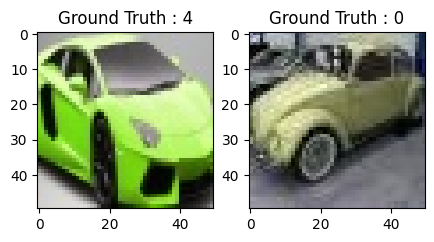

In [21]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

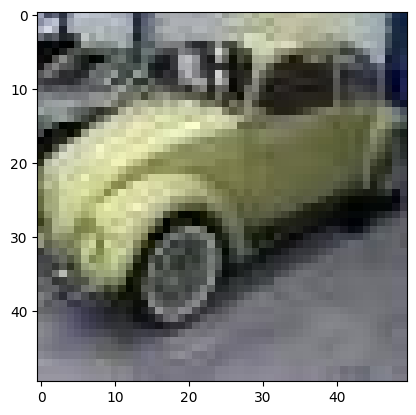

In [22]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X/255.
test_X = test_X/255.
plt.imshow(test_X[0,:,:])

In [23]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 4
After conversion to one-hot: [0. 0. 0. 0. 1.]


In [24]:
#Mezclar todo y crear los grupos de entrenamiento y testing
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)
print(train_X.shape,valid_X.shape,train_label.shape,valid_label.shape)

(45859, 50, 50, 3) (11465, 50, 50, 3) (45859, 5) (11465, 5)


In [78]:
#declaramos variables con los parámetros de configuración de la red
INIT_LR = 2e-3 # Valor inicial de learning rate. El valor 1e-3 corresponde con 0.001
epochs = 50 # Cantidad de iteraciones completas al conjunto de imagenes de entrenamiento
batch_size = 64 # cantidad de imágenes que se toman a la vez en memoria

In [79]:
risk_situation_model = Sequential()
risk_situation_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(50,50,3)))
risk_situation_model.add(LeakyReLU(alpha=0.1))
risk_situation_model.add(MaxPooling2D((2, 2),padding='same'))
risk_situation_model.add(Dropout(0.5))


risk_situation_model.add(Flatten())
risk_situation_model.add(Dense(64, activation='linear'))
risk_situation_model.add(LeakyReLU(alpha=0.1))
risk_situation_model.add(Dropout(0.5))
risk_situation_model.add(Dense(nClasses, activation='softmax'))


C:\Users\Axl\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\Axl\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [80]:
risk_situation_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 50, 50, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 50, 50, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 25, 25, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 25, 25, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 20000)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │       1,280,064 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_3 (LeakyReLU)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 5)                   │             325 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,281,285 (4.89 MB)

 Trainable params: 1,281,285 (4.89 MB)

 Non-trainable params: 0 (0.00 B)

In [81]:
risk_situation_model.compile(
    loss=keras.losses.categorical_crossentropy, 
    optimizer=tf.keras.optimizers.SGD(learning_rate=INIT_LR, decay=INIT_LR / 100),
    metrics=['accuracy']
)

C:\Users\Axl\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\optimizers\base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [82]:
# este paso puede tomar varios minutos, dependiendo de tu ordenador, cpu y memoria ram libre
# Entrenamiento del modelo
risk_situation_train = risk_situation_model.fit(
    train_X, 
    train_label, 
    batch_size=batch_size, 
    epochs=epochs, 
    verbose=1, 
    validation_data=(valid_X, valid_label)
)

Epoch 1/50
717/717 ━━━━━━━━━━━━━━━━━━━━ 25s 34ms/step - accuracy: 0.2176 - loss: 1.6178 - val_accuracy: 0.2901 - val_loss: 1.5843
Epoch 2/50
717/717 ━━━━━━━━━━━━━━━━━━━━ 24s 34ms/step - accuracy: 0.2516 - loss: 1.5868 - val_accuracy: 0.3625 - val_loss: 1.5418
Epoch 3/50
717/717 ━━━━━━━━━━━━━━━━━━━━ 24s 34ms/step - accuracy: 0.2942 - loss: 1.5553 - val_accuracy: 0.4019 - val_loss: 1.4995
Epoch 4/50
717/717 ━━━━━━━━━━━━━━━━━━━━ 24s 33ms/step - accuracy: 0.3267 - loss: 1.5166 - val_accuracy: 0.4255 - val_loss: 1.4470
Epoch 5/50
717/717 ━━━━━━━━━━━━━━━━━━━━ 23s 33ms/step - accuracy: 0.3518 - loss: 1.4823 - val_accuracy: 0.4596 - val_loss: 1.3929
Epoch 6/50
717/717 ━━━━━━━━━━━━━━━━━━━━ 23s 33ms/step - accuracy: 0.3744 - loss: 1.4433 - val_accuracy: 0.4948 - val_loss: 1.3494
Epoch 7/50
717/717 ━━━━━━━━━━━━━━━━━━━━ 24s 33ms/step - accuracy: 0.4027 - loss: 1.4064 - val_accuracy: 0.5241 - val_loss: 1.3040
Epoch 8/50
717/717 ━━━━━━━━━━━━━━━━━━━━ 23s 32ms/step - accuracy: 0.4253 - loss: 1.3682 - 

In [83]:
# guardamos la red, para reutilizarla en el futuro, sin tener que volver a entrenar
risk_situation_model.save("C:\\Users\\Axl\\PycharmProjects\\IA\\cars_on3.h5")

In [85]:
test_eval = risk_situation_model.evaluate(test_X, test_Y_one_hot, verbose=1)

ValueError: Data cardinality is ambiguous. Make sure all arrays contain the same number of samples.'x' sizes: 1
'y' sizes: 14332


In [86]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.21937938034534454
Test accuracy: 0.9561819434165955


In [87]:
risk_situation_train.history

{'accuracy': [0.22484135627746582,
  0.2641575336456299,
  0.30081337690353394,
  0.3324974477291107,
  0.3579232096672058,
  0.3827601969242096,
  0.4081641435623169,
  0.43502911925315857,
  0.46274450421333313,
  0.4924878478050232,
  0.52018141746521,
  0.5475261211395264,
  0.5701389312744141,
  0.5944307446479797,
  0.610632598400116,
  0.6277720928192139,
  0.6442137956619263,
  0.6581259965896606,
  0.6715366840362549,
  0.6809786558151245,
  0.6952179670333862,
  0.7074729204177856,
  0.715671956539154,
  0.7224535942077637,
  0.73534095287323,
  0.742078959941864,
  0.7524368166923523,
  0.7585424780845642,
  0.7689875364303589,
  0.7736758589744568,
  0.780392050743103,
  0.7876752614974976,
  0.7948930263519287,
  0.8027868270874023,
  0.8073878884315491,
  0.8151071667671204,
  0.8223685622215271,
  0.8271876573562622,
  0.8327046036720276,
  0.8332933783531189,
  0.8391373753547668,
  0.8442835807800293,
  0.850280225276947,
  0.855862557888031,
  0.857149064540863,
  0.8

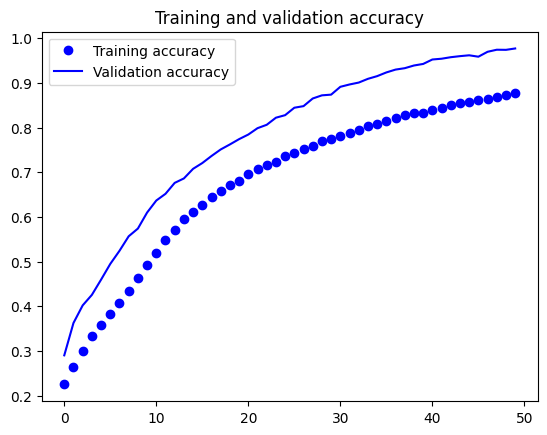

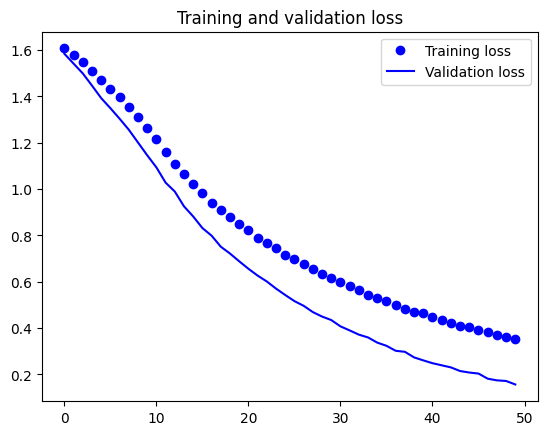

In [88]:
accuracy = risk_situation_train.history['accuracy']
val_accuracy = risk_situation_train.history['val_accuracy']
loss = risk_situation_train.history['loss']
val_loss = risk_situation_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [35]:
predicted_classes2 = risk_situation_model.predict(test_X)

448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


In [36]:
predicted_classes=[]
for predicted_risk_situation in predicted_classes2:
    predicted_classes.append(predicted_risk_situation.tolist().index(max(predicted_risk_situation)))
predicted_classes=np.array(predicted_classes)

In [37]:
predicted_classes.shape, test_Y.shape

((14332,), (14332,))

Found 13704 correct labels


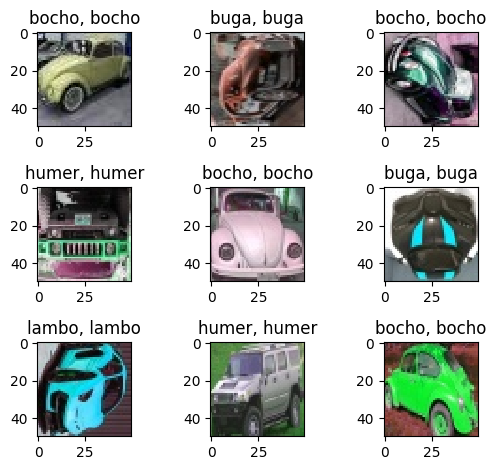

In [38]:
correct = np.where(predicted_classes == test_Y)[0]
print("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(50, 50, 3), interpolation='none')
    plt.title("{}, {}".format(situaciones[predicted_classes[correct]],
                                                   situaciones[test_Y[correct]]))

    plt.tight_layout()
plt.show()

Found 628 incorrect labels


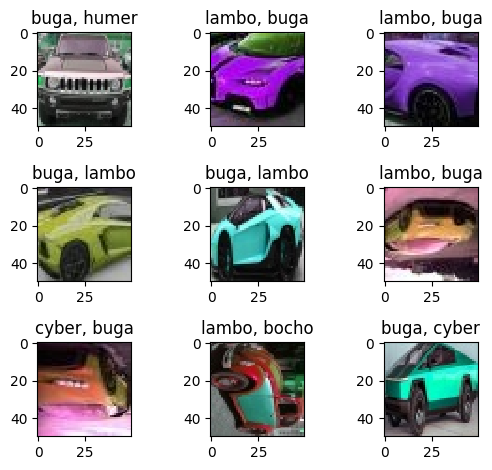

In [39]:
incorrect = np.where(predicted_classes!=test_Y)[0]
print("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(50,50,3), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(situaciones[predicted_classes[incorrect]],
                                                    situaciones[test_Y[incorrect]]))
    plt.tight_layout()

In [40]:
target_names = ["Class {}".format(i) for i in range(nClasses)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.98      0.97      0.97      2851
     Class 1       0.93      0.91      0.92      2742
     Class 2       0.97      0.98      0.98      2928
     Class 3       0.97      0.98      0.98      2833
     Class 4       0.93      0.95      0.94      2978

    accuracy                           0.96     14332
   macro avg       0.96      0.96      0.96     14332
weighted avg       0.96      0.96      0.96     14332



In [31]:
from skimage.transform import resize

images=[]
# AQUI ESPECIFICAMOS UNAS IMAGENES
filenames = ['C:\\Users\\Axl\\PycharmProjects\\IA\\images\\testp2.jpg']

for filepath in filenames:
    image = plt.imread(filepath,0)
    image_resized = resize(image, (50, 50),anti_aliasing=True,clip=False,preserve_range=True)
    images.append(image_resized)

X = np.array(images, dtype=np.uint8) #convierto de lista a numpy
test_X = X.astype('float32')
test_X = test_X / 255.

predicted_classes = risk_situation_model.predict(test_X)

for i, img_tagged in enumerate(predicted_classes):
    print(filenames[i], situaciones[img_tagged.tolist().index(max(img_tagged))])

predicted_classes = np.argmax(predicted_classes, axis=1)

# Mostrar resultados y abrir la imagen con el texto de predicción
for i, img_tagged in enumerate(predicted_classes):
    # Obtener el nombre de la clase predicha
    pred_class = situaciones[img_tagged]

    # Cargar la imagen original en color
    img_color = cv.imread(filepath)
    if img_color is None:
        print(f"Error: no se pudo cargar la imagen {filepath}")
    else:
        # Redimensionar la imagen a su tamaño original
        img_color = cv.resize(img_color, (500, 500))

        # Dibujar el texto de predicción en la imagen
        cv.putText(img_color, f"Prediccion: {pred_class}", (10, 30), cv.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

        # Mostrar la imagen con el texto de predicción
        cv.imshow(filenames[i], img_color)
        cv.waitKey(0)
        cv.destroyAllWindows()

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Axl\\PycharmProjects\\IA\\images\\testp2.jpg'

In [160]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import resize
from keras.models import load_model

# Cargar el modelo h5
modelo_h5 = 'C:\\Users\\Axl\\PycharmProjects\\IA\\cars_on1.h5'
riesgo_model = load_model(modelo_h5)

images = []
# AQUI ESPECIFICAMOS UNAS IMAGENES
filenames = ['C:\\Users\\Axl\\PycharmProjects\\IA\\tests\\zza1.jpeg']

for filepath in filenames:
    image = plt.imread(filepath)
    image_resized = resize(image, (50, 50), anti_aliasing=True, clip=False, preserve_range=True)
    images.append(image_resized)

X = np.array(images, dtype=np.uint8)  # Convierto de lista a numpy
test_X = X.astype('float32')
test_X = test_X / 255.

predicted_classes = riesgo_model.predict(test_X)

# Asegúrate de tener una lista de etiquetas o categorías en 'sriesgos'
sriesgos = ['bocho', 'buga', 'cyber', 'humer', 'lambo']  # Reemplaza con tus etiquetas reales

for i, img_tagged in enumerate(predicted_classes):
    print(filenames[i], sriesgos[np.argmax(img_tagged)])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
C:\Users\Axl\PycharmProjects\IA\tests\zza1.jpeg buga
